# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 26 (Monday) 11:00 pm </b> </font>

Rohini Isarapu

# I. Introduction

The objective of the assignment is to implement Classification on the data set by using pocket algorithm,QDA(Quantitative Discriminant Analysis),LDA(Linear Discriminant Analysis) and Logistic regression.

The Pocket Algorithm and Logistic Regression require a alpha value for training the data set and a limited number of iterations. While QDA and LDA do not require either of those values.

# II. Data

The dataset “Deaths in United States” consists of a CSV file with 30 features and about 27 lakh rows. It consists of all the deaths which occurred in the year 2015 across United States with a precise information about the details of the death and statistical background of the departed. We can analyze the circumstances and how the death in U.S is different from other countries. The death reports are accurate as it is released by CDC (Centers for disease control and prevention) under the National Vital Statistics System.

Some of the important columns include:

•	Month_of_death

•	Sex

•	Place of death

•	Marital Status

•	Manner of death

•	Method of Disposition

The attribute values consist of numeric as well as strings.

# Preliminary Observation with respect to Visualization

I want to classify the deaths based on the gender(Male and Female) which is my dependent variable. The input features would be the manner of the death and age. The accuracy is decreasing while I am including other features of the data.

The women death rate is higher when the manner of death are as follows:
1) Death reason not known
2) Accident
3) Natural

The Men death rate is higher when the manner of death are as follows:
1)Suicide
2)Homicide
3)Self-inflicted

All the deaths occurred when the average age was 20 years.

# Data Preprocessing

Removed few columns as it the information was repetitive and I found no significance in regards with the analyzation of the deaths based on gender.

Encoded zeros and ones for Male and Female.
0: Male
1: Female

Encoded the values of the column "manner_of_death" as follows:
1:Accident
2:Suicide
3:Homicide
4:Pending investigation
5:Could not determine
6:Self-Inflicted
7:Natural
0:Not specified

The column "manner_of_death" had missing values. Replaced all the missing values with zeros.

Eliminated the rows where the age is greater than 100.



In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from pandas.tools import plotting
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
from copy import deepcopy as copy 
%matplotlib inline

In [55]:
UsDeaths=pd.read_csv("C:/Users/isara/Documents/2015_data.csv",engine='python',nrows=10000)

In [56]:
new_UsDeaths_Data=UsDeaths.drop(['education_1989_revision','education_2003_revision','education_reporting_flag','detail_age_type',
                       'age_substitution_flag','age_recode_52','age_recode_27','infant_age_recode_22','current_data_year','activity_code',
                       'icd_code_10th_revision','358_cause_recode','113_cause_recode','130_infant_cause_recode','39_cause_recode',
                       'number_of_entity_axis_conditions','entity_condition_1','entity_condition_2','entity_condition_3','entity_condition_4',
                       'entity_condition_5','entity_condition_6','entity_condition_7','entity_condition_8','entity_condition_9','entity_condition_10',
            'entity_condition_11','entity_condition_12','entity_condition_13','entity_condition_14','entity_condition_15','entity_condition_16','entity_condition_17','entity_condition_18',
                       'entity_condition_19','entity_condition_20','number_of_record_axis_conditions','record_condition_1',
                       'record_condition_2','record_condition_3','record_condition_4','record_condition_5','record_condition_6',
                       'record_condition_7','record_condition_8','record_condition_9','record_condition_10','record_condition_11','record_condition_12','record_condition_13',
                       'record_condition_14','record_condition_15','record_condition_16','record_condition_17','record_condition_18','record_condition_19',
                       'record_condition_20','race','bridged_race_flag','race_imputation_flag','race_recode_3','hispanic_origin','place_of_injury_for_causes_w00_y34_except_y06_and_y07_'],axis=1)

new_UsDeaths_Data = new_UsDeaths_Data[new_UsDeaths_Data.detail_age < 100][new_UsDeaths_Data.day_of_week_of_death< 8]
print(new_UsDeaths_Data)

      resident_status  month_of_death sex  detail_age  age_recode_12  \
0                   1               1   M          84             10   
1                   1               1   M          70              9   
2                   1               1   F          91             11   
3                   1               1   F          40              6   
4                   1               1   F          89             11   
5                   1               1   M          78             10   
6                   1               1   M          92             11   
7                   1               1   M          82             10   
8                   1               1   F          89             11   
9                   1               1   F          93             11   
10                  1               1   F          84             10   
11                  1               1   F          84             10   
12                  1               1   F          67           

C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [57]:
nans=new_UsDeaths_Data.isnull().any()
nans

resident_status                        False
month_of_death                         False
sex                                    False
detail_age                             False
age_recode_12                          False
place_of_death_and_decedents_status    False
marital_status                         False
day_of_week_of_death                   False
injury_at_work                         False
manner_of_death                         True
method_of_disposition                  False
autopsy                                False
race_recode_5                          False
hispanic_originrace_recode             False
dtype: bool

[Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'7.0')]

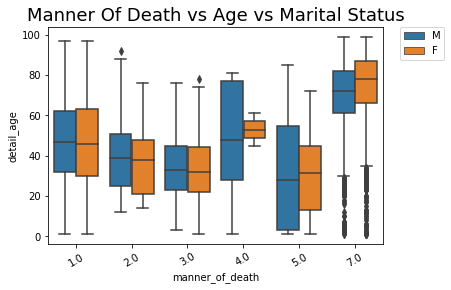

In [58]:
plt.title('Manner Of Death vs Age vs Marital Status', fontsize=18)
ax=sns.boxplot(x="manner_of_death",y="detail_age",hue="sex",data=new_UsDeaths_Data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [59]:
new_UsDeaths_Data.sex=new_UsDeaths_Data.sex.replace({'M':0,'F':1})

In [60]:
new_UsDeaths_Data['manner_of_death']=new_UsDeaths_Data['manner_of_death'].fillna(0)

In [61]:
new_UsDeaths_Data['manner_of_death']=new_UsDeaths_Data['manner_of_death'].astype(np.int64)

In [62]:
X=np.array(new_UsDeaths_Data.loc[:,["manner_of_death","detail_age"]])
T=np.array(new_UsDeaths_Data.loc[:,"sex",]).reshape(-1,1)

# III. Method

Super Class Definition:

The class BaseModel has two abstract methods train as well as use which is implemented in all the algorithms to train the dataset as well to predict the outcome.

The classifier is the super class for classification with the following functions defined:
1)_init_: This is used for initialization purpose with Mean and Standard deviation initialized to None.
2)normalize: In this function we normalize the input X. X is subtracted by mean and this is divided by the standard deviation.
3)_check_matrix: This is used to check if the shape of the matrix are correct or not.
4)add_ones:We add bias through this function

The methods in the Base Model are implemented in the classifier class.


Pocket Algorithm:

The pocket algorithm keeps the best solution which is obtained from the weights after iterating over the data set. The more the iterations the more accurate the prediction. But this algorithm can be time consuming since only one neural network is present.
The outcome in the compare function would be 1 or -1.The use method gives the predicted values where we perform the dot product of the normalized input feature X and w_pocket.

LDA:

For multi classification purpose LDA is used. It uses Linear discriminant function to determine the likelihood. The discriminant function uses Sigma,prior and mu.Unlike the pocket algorithm,there is no need to use alpha and iterate over the dataset.The mu, prior is calculated for each class of by assuming Sigma to be unique for all the classes.

QDA:

For multi classification purpose QDA is used. It uses Quadratic discriminant function to determine the likelihood. The discriminant function uses Sigma,prior and mu.Unlike the pocket algorithm,there is no need to use alpha and iterate over the dataset.The mu, prior,Sigma is calculated for each class.

Logistic Regression:

The logistic regression is a regression model in which the dependent variable is categorical value. The outcome is either 0 or 1.It directly predicts  P(T=k∣x)P(T=k∣x) , not the class label  k.The gradient update one column of the weight matrix, so that we can combine the computations.

X:Input features
T:Target value
w:weight
g():softmax function







### A. Super Classs Definition

In [63]:
import numpy as np
import abc
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None
    
    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs


    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [64]:
class perceptron(Classifier):
    
    def __init__(self,alpha ):
        Classifier.__init__(self)
        self.alpha=alpha
        self.w=[]
        self.w_pocket=[]
        
    def compare(self,X, T):
        y = np.sign(X @ self.w)
        yp = np.sign(X @ self.w_pocket)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1


    
    def train(self,X,T):
        Xs = self.add_ones(self.normalize(X))
        self.w=np.zeros(Xs.shape[1])
        self.w_pocket=np.zeros(Xs.shape[1])
        N=Xs.shape[0]
        w_pocket = copy(self.w)
        for i in range(100):
            
            converged = True
            
            for k in range(N):
                
                y = self.w @ Xs[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * Xs[k]
                    converged = False
                    z=perceptron.compare(self,Xs,T)
                    if (z>0):
                        self.w_pocket=self.w
            if converged:
                print("converged at ", i)
                break

    def use(self,X):
        Y = self.add_ones((X-self.meanX)/self.stdX) @ self.w_pocket.T
        return Y
    

### B. LDA

In [65]:
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu = []
        self.Sigma = None
        self.prior = []
        
    def discriminant(self, X, mu, sigma, prior):
        sigma=np.asmatrix(sigma)
        sigmaInv = np.linalg.inv(sigma)
        return (X@sigmaInv@mu.T) - (0.5*mu@sigmaInv@mu.T) + np.log(prior)
    
    def train(self, X, T):
        Xs = self.normalize(X)
        N = Xs.shape[0]
        self.Sigma = np.cov(Xs.T)
        print(self.Sigma)
        
        for c in np.unique(T):
            c= c==T
            mu = np.mean(Xs,0)
            
            prior = np.sum(c) / N
            
            self.mu.append(mu)
            self.prior.append(prior)
            
            
    def use(self, X):
        Xs = (X-self.meanX)/self.stdX
        d = []
        for i in range(len(self.mu)):
            d.append(self.discriminant(Xs, self.mu[i], self.Sigma, self.prior[i]))
        return np.argmax(np.array(d),axis=0)

### C. QDA

In [66]:
class QDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu = []
        self.Sigma = []
        self.prior = []
   
    def discriminant(self, X, mu, sigma, prior):
        sigma=np.asmatrix(sigma)
        detSigma=np.linalg.det(sigma)
        covar=X-mu.T
        sigmaInv = np.linalg.inv(sigma)
        print(sigmaInv.shape)
        return ((-0.5 * np.log(detSigma)) - (0.5 * np.sum((covar) @ sigmaInv * (covar.T),axis=1) + np.log(prior)))
    #[:,np.newaxis]
    
    def train(self, X, T):
        Xs = self.normalize(X)
        N = Xs.shape[0]

        for c in np.unique(T):
            c= c==T
            mu = np.mean(Xs,0)
            Sigma=np.cov(Xs.T)
            
            prior = np.sum(c) / N
            
            self.mu.append(mu)
            self.prior.append(prior)
            self.Sigma.append(Sigma)
            
            
    def use(self, X):
        Xs = (X-self.meanX)/self.stdX
        d = []
        for i in range(len(self.mu)):
            print(Xs)
            print(self.mu)
            print(self.Sigma)
            print(self.prior)
            d.append(self.discriminant(Xs, self.mu[i], self.Sigma[i], self.prior[i]))
        return np.argmax(np.array(d),axis=0)

### E. Logistic Regression

In [67]:
class LogRegress(Classifier):
    def __init__(self, alpha):
        Classifier.__init__(self)
        self.w = []
        self.maxRuns = 1000
        self.alpha = alpha
        
    def g(self, X):
        z = X @ self.w
        return  np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
        
    def train(self, X, T):
        K = len(np.unique(T)) 
        D = X.shape[1] 
        
        Xs = self.add_ones(self.normalize(X))
        N = Xs.shape[0]
        
        Tt = np.zeros((N, K))
        Tt[np.arange(N), T] = 1

        self.w = np.zeros((D+1,K))
        
        for i in range(self.maxRuns):
            self.w += self.alpha * Xs.T @ (Tt-self.g(Xs))
    
    def use(self, X):
        Xs = self.add_ones(X)
        Y = self.g(Xs)
        return np.argmax(Y,1)

# IV. Experiments

Precision: Gives the accuracy of positive predictions. 
                 TP/TP+FP 
Recall: This measure give you how the model's prediction covers the positive class. 
                 TP/TP+FN 
Specificity: Gives the True Negative rate 
                 TN/TN+FP

Pocket Algorithm: Since, the execution of this algorithm was taking time, I have included only 300 rows and implemented it with 5 different alpha values.
It shows the same performance measurement for all the values.But since I am taking only a part of my dataset for this algorithm, comparing it with other three algorithms would not be a right choice. 
I plotted Target values and the predicted values.The predicted value of Gender: male overlaps with the target values.

LDA: LDA has around 0.65 accuracy. This value changes as the train and split function randomly takes the train data set and test data set. 
The precision is zero where as the specificity is 1 which means the negatives are correctly predicted as negatives. 
I plotted Target values and the predicted values. The predicted value of Gender: male overlaps with the target values.

QDA: QDA has around 0.35 accuracy. This value changes as the train and split function randomly takes the train data set and test data set.
The precision is 0.7(positive predictions accuracy) where as the specificity is 1 which means the negatives are correctly predicted as negatives.
The predicted value of Gender: female overlaps with the target values. I plotted Target values and the predicted values.When compared to LDA and Logistic regression it has more accuracy value.

Logistic Regression:Logistic has around 0.65 accuracy. This value changes as the train and split function randomly takes the train data set and test data set. 
The precision is zero where as the specificity is 1 which means the negatives are correctly predicted as negatives.
I plotted Target values and the predicted values. The predicted value of Gender: male overlaps with the target values.

Comparison: Among all the algorithms, Logistic Regression and LDA is suitable for my dataset.


In [68]:
def acc(cfm):
    #cfm=cfm.as_matrix()
    cfm=np.array(cfm)
    return (cfm[1,1]+cfm[0,0])/(cfm[0,0]+cfm[0,1]+cfm[1,0]+cfm[1,1])

def recall(cfm):
    cfm=np.array(cfm)
    return cfm[1,1]/(cfm[1,1]+cfm[0,1])

def precision(cfm):
    cfm=np.array(cfm)
    if cfm[1, 1] + cfm[1, 0] == 0 :
        return 0
    else:
        return cfm[1, 1] / (cfm[1, 1] + cfm[1, 0])
    
def specificity(cfm):
    cfm=np.array(cfm)
    return cfm[0,0]/(cfm[0,0]+cfm[1,0])

def confusion_matrix(Y, T):
    """
        Y    nd.array
             predicted labels
        T    nd.array
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm
    

In [69]:
UsDeaths1=new_UsDeaths_Data[:100]

In [70]:
X=np.array(UsDeaths1.loc[:,["detail_age"]])
T=np.array(UsDeaths1.loc[:,"sex",]).reshape(-1,1)
print(T.shape, X.shape)

(100, 1) (100, 1)


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,T,test_size=0.2)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
print(Y_train.shape)

(80, 1) (80, 1)
(20, 1) (20, 1)
(80, 1)


In [72]:
for alpha in (0.1,0.01,0.001,0.0001,0.00001):
    ls1 = perceptron(alpha)
    ls1.train(X_train, Y_train)
    Y=ls1.use(X_test).T
    cfm = confusion_matrix(Y,Y_test)
    s1=precision(cfm)
    s=acc(cfm1)
    s2=specificity(cfm)
    s3=recall(cfm)
    print("Alhpa Value:",alpha)
    df = pd.DataFrame({'Measures':['Accuracy','Precision','Specificity','Recall'],'Values':[s,s1,s2,s3]})
    print(df)
    

Alhpa Value: 0.1
      Measures  Values
0     Accuracy     0.5
1    Precision     0.0
2  Specificity     1.0
3       Recall     0.0
Alhpa Value: 0.01
      Measures  Values
0     Accuracy     0.5
1    Precision     0.0
2  Specificity     1.0
3       Recall     0.0
Alhpa Value: 0.001
      Measures  Values
0     Accuracy     0.5
1    Precision     0.0
2  Specificity     1.0
3       Recall     0.0
Alhpa Value: 0.0001
      Measures  Values
0     Accuracy     0.5
1    Precision     0.0
2  Specificity     1.0
3       Recall     0.0
Alhpa Value: 1e-05
      Measures  Values
0     Accuracy     0.5
1    Precision     0.0
2  Specificity     1.0
3       Recall     0.0


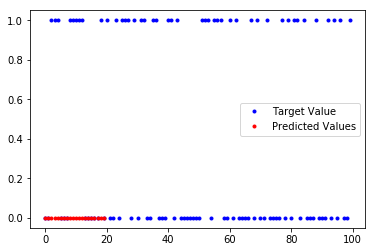

In [73]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(T, '.', color='b', label='Target Value')
ax.plot(Y, '.', color='r', label='Predicted Values')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [74]:
ls = LDA()
ls.train(X_train, Y_train)
Y=ls.use(X_test).T
cfm1 = confusion_matrix(Y,Y_test)
s3=precision(cfm1)
s4=acc(cfm1)
s2=specificity(cfm1)
s5=recall(cfm)
df = pd.DataFrame({'Measures':['Accuracy','Precision','Specificity','Recall'],'Values':[s4,s3,s2,s5]})
print(df)

1.0126582278481013
      Measures  Values
0     Accuracy    0.65
1    Precision    0.00
2  Specificity    1.00
3       Recall    0.00


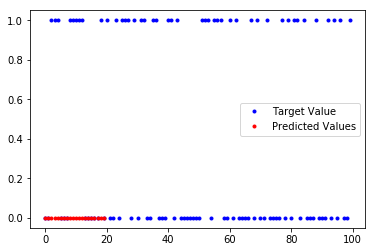

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(T, '.', color='b', label='Target Value')
ax.plot(Y, '.', color='r', label='Predicted Values')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [76]:
ls2 = QDA()
ls2.train(X_train, Y_train)
Y=ls2.use(X_test).T
cfm1 = confusion_matrix(Y,Y_test.T)
s1=precision(cfm1)
s=acc(cfm1)
s2=specificity(cfm1)
s6=recall(cfm)
df = pd.DataFrame({'Measures':['Accuracy','Precision','Specificity','Recall'],'Values':[s,s1,s2,s6]})
print(df)

[[-1.23252151]
 [-0.82722965]
 [ 0.79393782]
 [-0.47983662]
 [ 1.25712852]
 [-0.71143197]
 [-1.11672384]
 [ 0.33074711]
 [-0.71143197]
 [ 1.43082503]
 [ 1.60452155]
 [ 0.09915176]
 [ 0.56234246]
 [-2.91158781]
 [ 0.67814014]
 [ 0.90973549]
 [-2.21680176]
 [-0.36403894]
 [ 1.19922968]
 [ 1.02553317]]
[array([  3.33066907e-16]), array([  3.33066907e-16])]
[array(1.0126582278481013), array(1.0126582278481013)]
[0.55000000000000004, 0.45000000000000001]
(1, 1)
[[-1.23252151]
 [-0.82722965]
 [ 0.79393782]
 [-0.47983662]
 [ 1.25712852]
 [-0.71143197]
 [-1.11672384]
 [ 0.33074711]
 [-0.71143197]
 [ 1.43082503]
 [ 1.60452155]
 [ 0.09915176]
 [ 0.56234246]
 [-2.91158781]
 [ 0.67814014]
 [ 0.90973549]
 [-2.21680176]
 [-0.36403894]
 [ 1.19922968]
 [ 1.02553317]]
[array([  3.33066907e-16]), array([  3.33066907e-16])]
[array(1.0126582278481013), array(1.0126582278481013)]
[0.55000000000000004, 0.45000000000000001]
(1, 1)
      Measures  Values
0     Accuracy    0.35
1    Precision    0.35
2  Specif

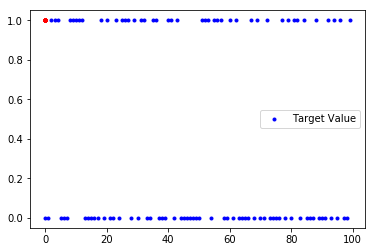

In [77]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(T, '.', color='b', label='Target Value')
ax.plot(Y, '.', color='r')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

In [78]:
for alpha in (0.1,0.01,0.001,0.0001,0.00001):
    ls3 = LogRegress(alpha)
    ls3.train(X_train, Y_train)
    Y=ls3.use(X_test).T
    cfm1 = confusion_matrix(Y,Y_test)
    s1=precision(cfm1)
    s=acc(cfm1)
    s2=specificity(cfm1)
    s7=recall(cfm)
    print("Alpha value:",alpha)
    df = pd.DataFrame({'Measures':['Accuracy','Precision','Specificity','Recall'],'Values':[s,s1,s2,s7]})
    print(df)
    

Alpha value: 0.1
      Measures  Values
0     Accuracy    0.65
1    Precision    0.00
2  Specificity    1.00
3       Recall    0.00
Alpha value: 0.01
      Measures  Values
0     Accuracy    0.65
1    Precision    0.00
2  Specificity    1.00
3       Recall    0.00
Alpha value: 0.001
      Measures  Values
0     Accuracy    0.65
1    Precision    0.00
2  Specificity    1.00
3       Recall    0.00
Alpha value: 0.0001
      Measures  Values
0     Accuracy    0.65
1    Precision    0.00
2  Specificity    1.00
3       Recall    0.00
Alpha value: 1e-05
      Measures  Values
0     Accuracy    0.65
1    Precision    0.00
2  Specificity    1.00
3       Recall    0.00


C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


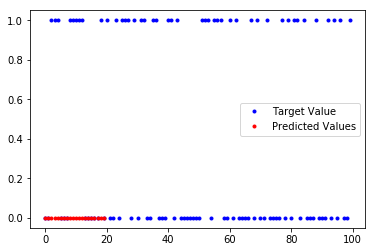

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(T, '.', color='b', label='Target Value')
ax.plot(Y, '.', color='r', label='Predicted Values')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

# Conclusions

The classifier I think the best is Logistic Regression and LDA because the performance measurement is better when compared to other algorithms. The challenge was in the implementation part and doing experiments with different algorithms on the dataset.

# References
https://www.kaggle.com/cdc/mortality

# Extra Credit

Search for a ordinal data set and apply your classifiers to it. 
Repeat the experiments on it. 
Do you have different observation from previous results? 
Were you able to observe that we discussed in class about logistic regression? 
For a full extra credit point, you need to discuss all bullet points in Results section.     

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
|10| Discussion about evaluation metrics
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)